# **1. Análisis exploratorio de datos (EDA)**

## 1.1 Contexto de los datos

En el desarrollo de esta investigación, se emplea un conjunto de datos sintéticos generado mediante el simulador PaySim. Este simulador utiliza datos agregados de un conjunto de datos privado para simular transacciones de dinero móvil, reproduciendo el comportamiento normal e introduciendo también comportamiento malicioso. Los datos originales provienen de un servicio de dinero móvil implementado en un país africano y fueron proporcionados por una empresa multinacional. El conjunto de datos sintéticos es una reducción del 25% del conjunto original y se han descargado de Kaggle. Este conjunto posibilita la evaluación del rendimiento de los métodos de detección de fraude en un entorno simulado.

**Descripción de las características:**



*  **Step:** asigna una unidad de tiempo en el mundo real. En este caso 1 paso (Step)es 1 hora de tiempo. Pasos totales 744 (simulación de 30 días).

*   Type: ENTRADA DE EFECTIVO (CASH-IN), SALIDA DE EFECTIVO (CASH-OUT), DÉBITO
(DEBIT), PAGO (PAYMENT) y TRANSFERENCIA (TRANSFER).


* **Amount**: monto de la transacción en moneda local.

* **NameOrig**: cliente que inició la transacción

* **OldbalanceOrg**: saldo inicial antes de la transacción

* **NewbalanceOrig**: nuevo saldo después de la transacción.

* **NameDest**: cliente el cual es el destinatario de la transacción

* **OldbalanceDest**: destinatario del saldo inicial antes de la transacción. Se debe tener en cuenta que no hay información para los clientes que comienzan con M (Comerciantes).

* **NewbalanceDest**: destinatario del nuevo saldo después de la transacción. Se debe tener en cuenta que no hay información para los clientes que comienzan con M (Comerciantes).

* **IsFraud**: variable objetivo, donde 1 representa una transacción fraudulenta
(son las transacciones realizadas por los agentes fraudulentos dentro de la simulación. En este conjunto de datos específico, el comportamiento fraudulento de los agentes tiene como objetivo obtener ganancias tomando el control de las cuentas de los clientes e intentar vaciar los fondos transfiriéndolos a otra cuenta y luego cobrándolos del sistema).

* **IsFlaggedFraud**: el modelo de negocio tiene como objetivo controlar las transferencias masivas de una cuenta a otra y detectar intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en una sola transacción.

**Fuente de datos**: https://www.kaggle.com/datasets/ealaxi/paysim1

##1.2 Lectura de datos

Se carga la base de datos a un dataframe, la cual proviene de un archivo local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Maestría/Integrador_semestre_2/Datos completos.csv'

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as pdf
import seaborn as sns
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


El tamaño del dataset es de 6362620 filas y 11 columnas

## 1.3. Perfil del conjunto de datos

In [ ]:
#Tipos de datos y cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#verifica si hay valores nulos
df.isnull().values.any()

False

No hay valores nulos en el conjunto de datos

In [ ]:
#Variables del DataFrame
numero_de_caracteristicas = df.shape[1]
print(f'El número de características en el DataFrame es: {numero_de_caracteristicas}')

El número de características en el DataFrame es: 11


In [ ]:
#Filas del Dataframe
numero_de_filas = df.shape[0] - 1 #Sin el encabezado
print(f'El número de filas en el DataFrame es: {numero_de_filas}')

El número de filas en el DataFrame es: 6362619


##1.4 Estadísticas generales

Se presenta un resumen de estadística descriptiva para las variables numéricas con el fin de entender la distribución general de los datos

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


##1.4.1 Separación de variables

Se busca entender la distribución y las características de las variables categóricas y numéricas por separado, ya que puede proporcionar información valiosa sobre la naturaleza de los datos.

In [ ]:
#Separar las características de la variable objetivo
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [ ]:
model_features = df.columns.drop('isFraud')
model_target = 'isFraud'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')
Model target:  isFraud


In [ ]:
#Se separan las variables categóricas de las numéricas
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)

Numerical columns: Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')

Categorical columns: Index(['type', 'nameOrig', 'nameDest'], dtype='object')


## 1.5 Estadística univariada: gráficas básicas



Se obtendrán representaciones visuales de la distribución y características de cada variable a nivel individual

In [ ]:
# Obtener valores distintos para cada columna
for columna in df.columns:
    valores_distintos = df[columna].drop_duplicates()
    print(f"Valores distintos en la columna {columna}:\n{valores_distintos}\n")

Valores distintos en la columna step:
0            1
2708         2
3722         3
4274         4
4839         5
          ... 
6362560    739
6362570    740
6362576    741
6362598    742
6362612    743
Name: step, Length: 743, dtype: int64

Valores distintos en la columna type:
0       PAYMENT
2      TRANSFER
3      CASH_OUT
9         DEBIT
389     CASH_IN
Name: type, dtype: object

Valores distintos en la columna amount:
0             9839.64
1             1864.28
2              181.00
4            11668.14
5             7817.71
              ...    
6362606     303846.74
6362612    1258818.82
6362614     339682.13
6362616    6311409.28
6362618     850002.52
Name: amount, Length: 5316900, dtype: float64

Valores distintos en la columna nameOrig:
0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720
              ...     
6362615     C786484425
6362616    C1529008245
6362617    C1162922333
6362618    C1685995037
6362619    C

###1.5.1 Gráficos de isFraud

In [ ]:
#Distribución de isFraud - variable objetivo
df[model_target].value_counts()
#Donde 1 representa fraude

0    6354407
1       8213
Name: isFraud, dtype: int64

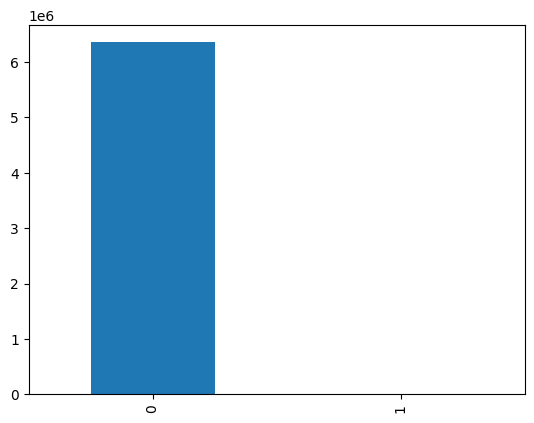

In [ ]:
df[model_target].value_counts().plot.bar()
plt.show()


###1.5.2 Gráfico de type

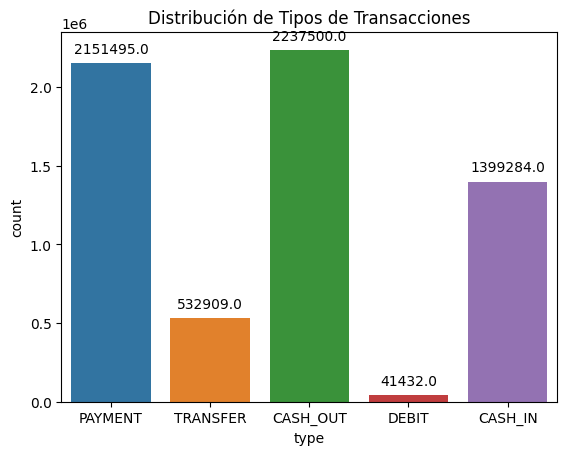

In [ ]:
# Gráfico de recuento de type:
# Distribución de las transacciones por tipo
ax = sns.countplot(x='type', data=df)
plt.title('Distribución de Tipos de Transacciones')

# Agregar etiquetas dentro de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

###1.5.3 Gráficos de las variables númericas con respecto a la variable categórica type

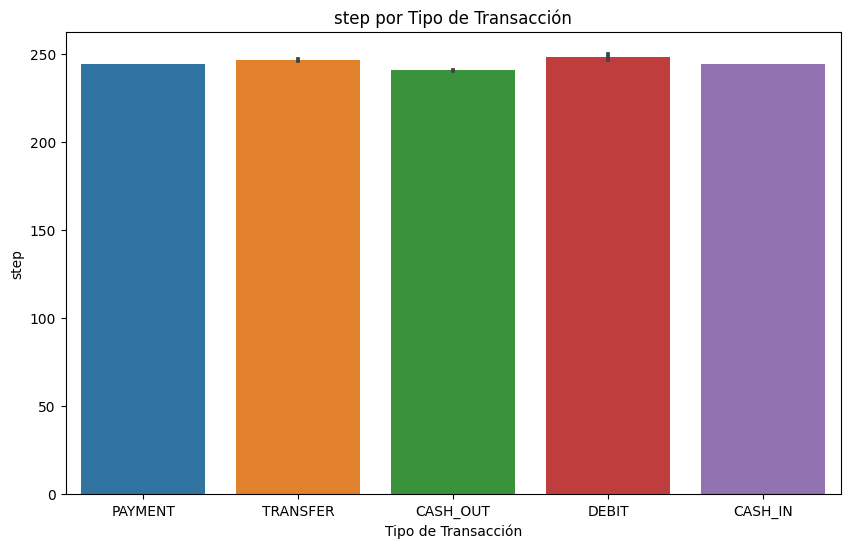

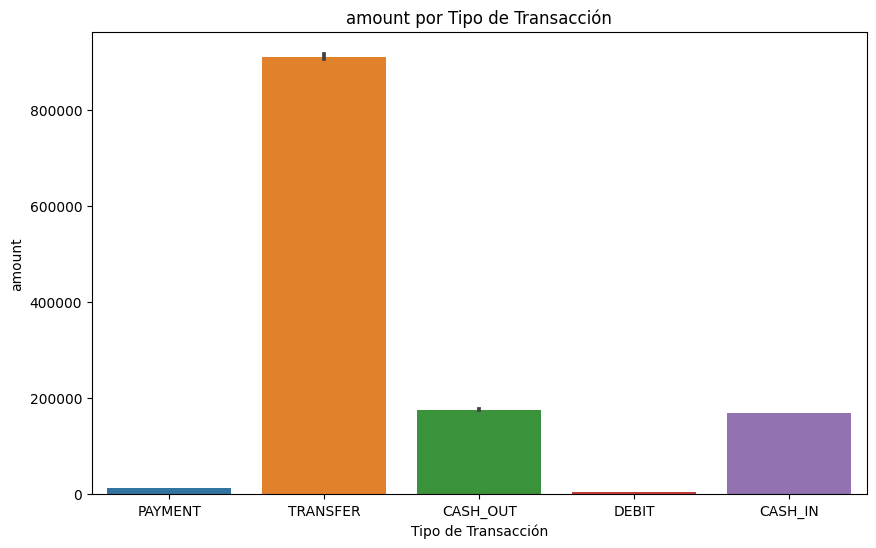

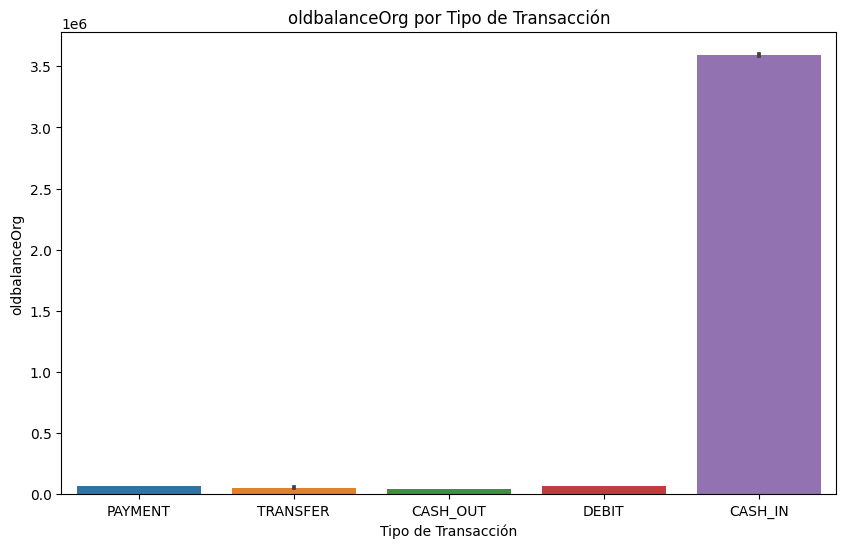

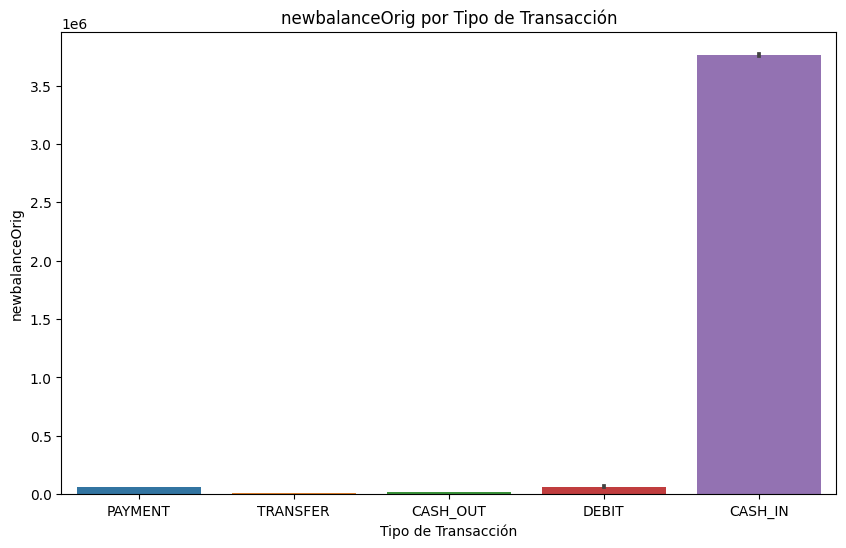

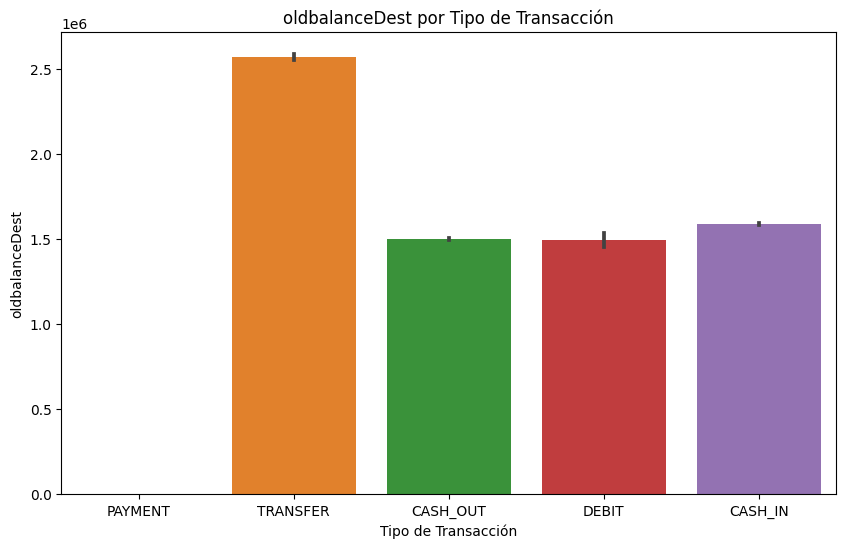

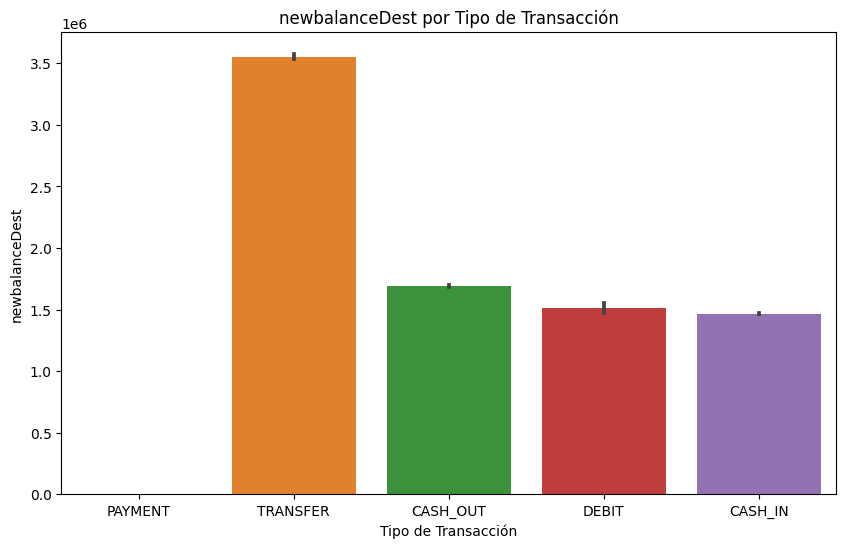

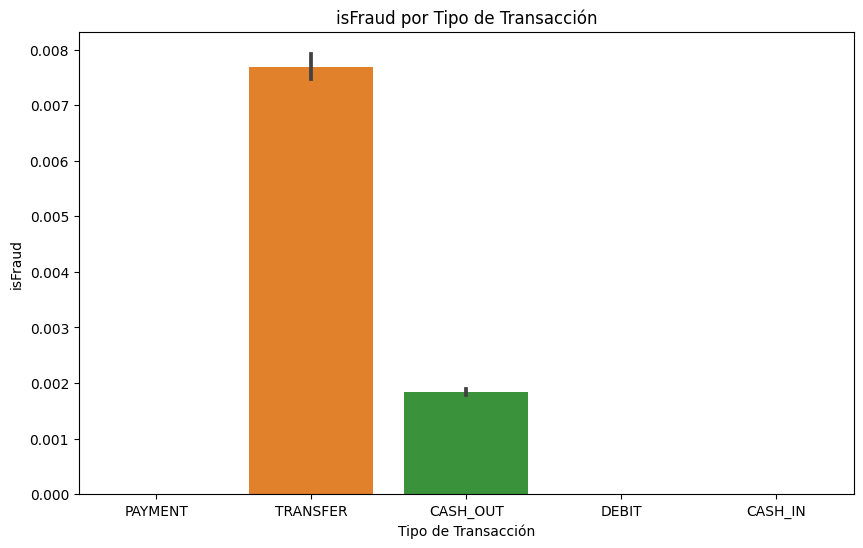

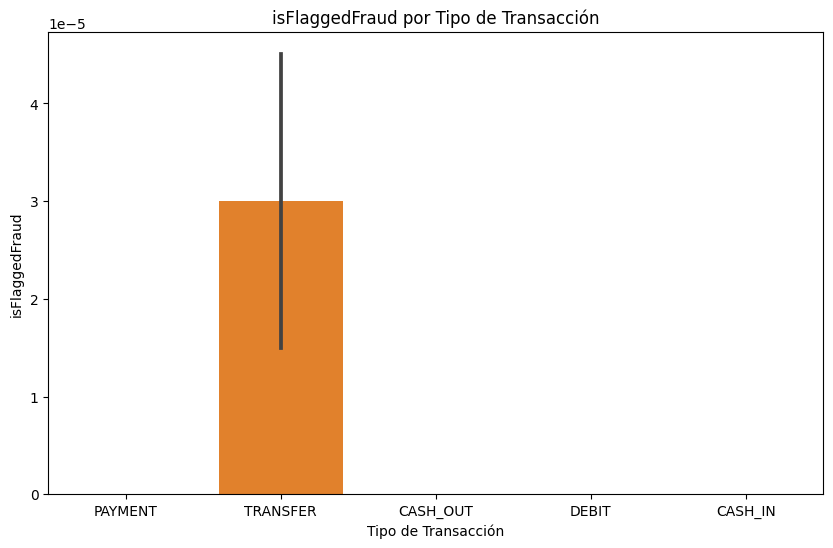

In [ ]:
#Gráficos
numeric_columns1 = df.select_dtypes(include='number').columns

# Crear gráficos para cada variable numérica
for column in numeric_columns1:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='type', y=column, data=df)
    plt.title(f'{column} por Tipo de Transacción')
    plt.xlabel('Tipo de Transacción')
    plt.ylabel(column)
    plt.show()

### 1.6 Análisis de los datos fraudulentos

Dado el anterior análisis y conociendo que los registros fraudulentos se identifican en la variable isFraud con valor de 1, se procede a filtrar para analizar el comportamiento

In [ ]:
# Filtrar solo los registros donde isFraud es 1 (fraudulento)
df_fraud = df[df['isFraud'] == 1]

In [ ]:
df_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
grouped_type = df_fraud.groupby('type').size().reset_index(name='count')
print(grouped_type)

       type  count
0  CASH_OUT   4116
1  TRANSFER   4097


Por consiguiente, se decide retirar los datos con tipos a los cuales no se le detectó fraude y se dejan en el análisis el tipo CASH_OUT y TRANSFER.

### 1.6.1 Variables con fraude

In [ ]:
df_fraude = df.loc[(df['type'] == 'CASH_OUT') | (df['type'] == 'TRANSFER')]

In [ ]:
df_fraude.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [ ]:
#Distribución de isFraud - variable objetivo balanceada
df_balanceado[model_target].value_counts()
#Donde 1 representa fraude

0    2762196
1       8213
Name: isFraud, dtype: int64

## 1.6.2 Gráficos después de retirar las variables sin fraude

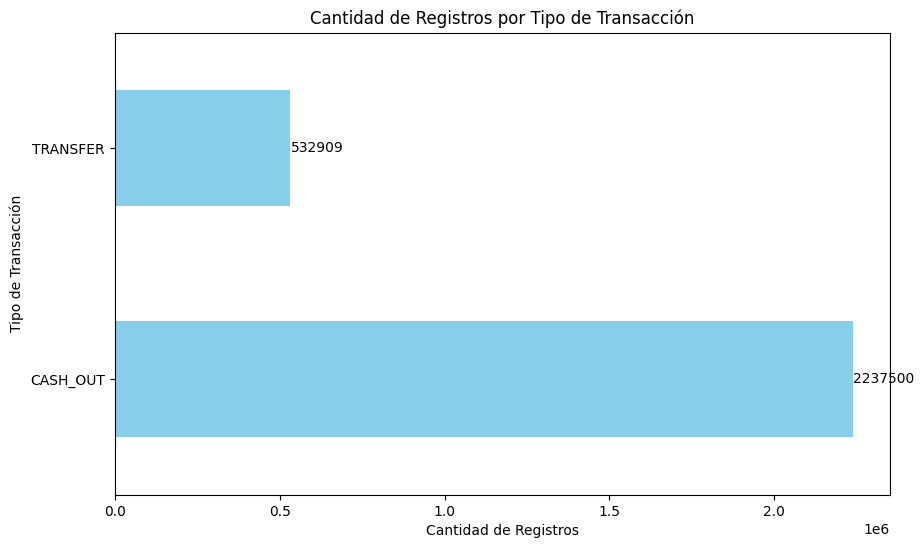

In [ ]:
# Contar la cantidad de registros para cada tipo de transacción
conteo_por_tipo = df_balanceado['type'].value_counts()

# Graficar barras horizontales
ax = conteo_por_tipo.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Cantidad de Registros por Tipo de Transacción')
plt.xlabel('Cantidad de Registros')
plt.ylabel('Tipo de Transacción')

# Agregar etiquetas dentro de las barras
for index, value in enumerate(conteo_por_tipo):
    ax.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

plt.show()

  Gráficos de las variables númericas con respecto a la variable type filtrada

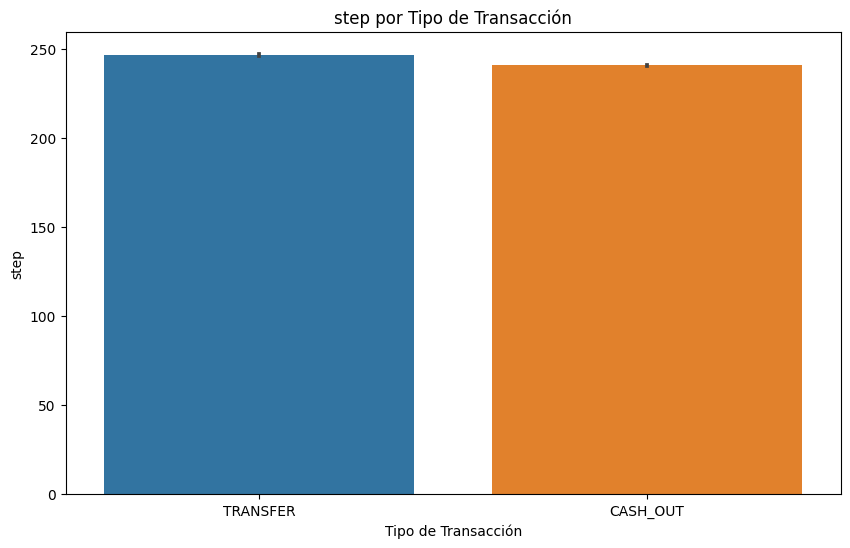

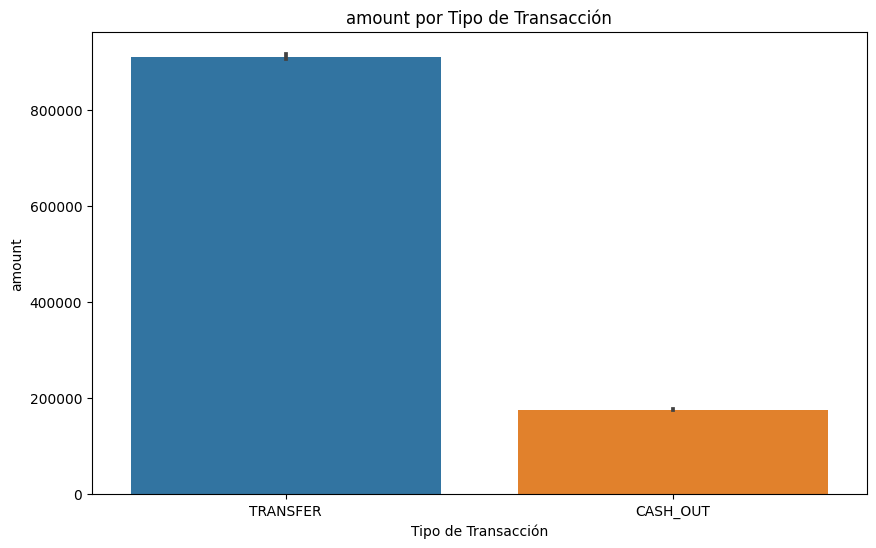

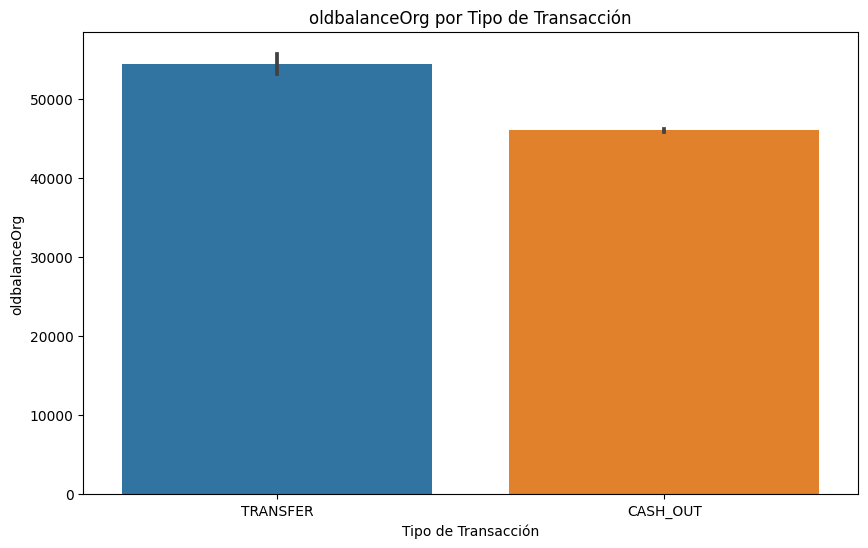

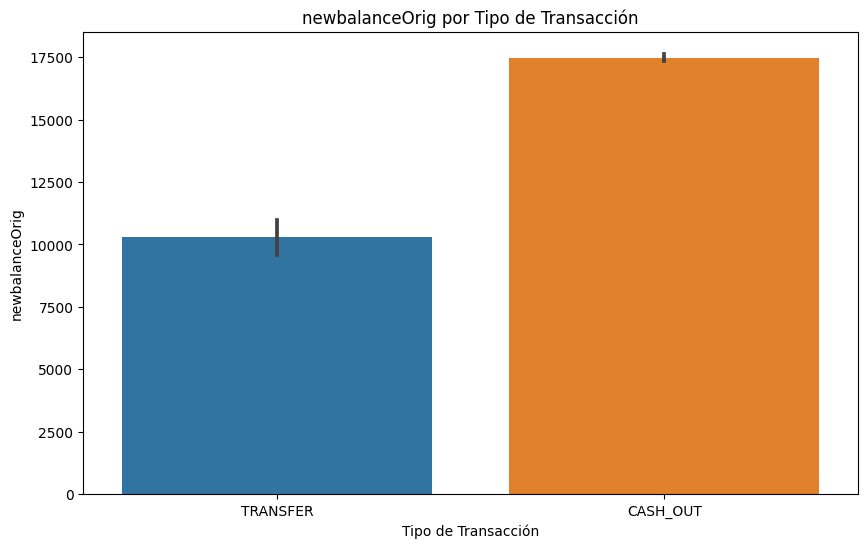

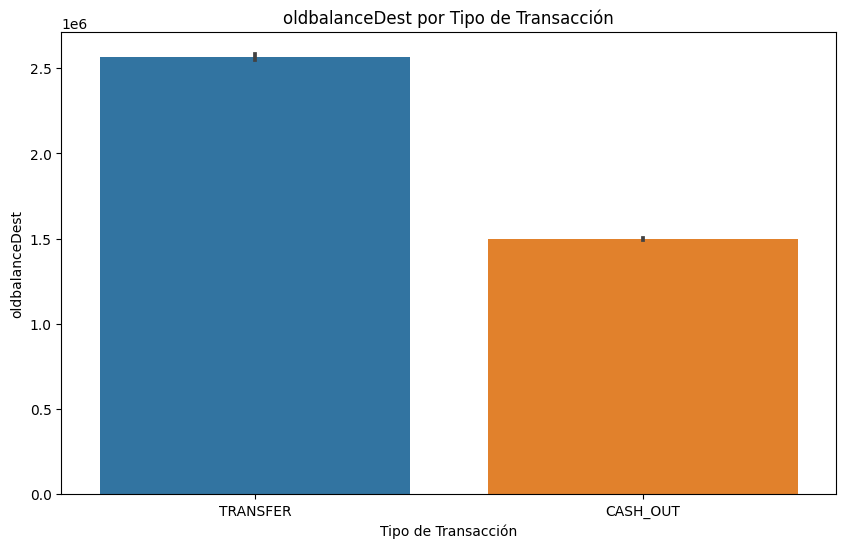

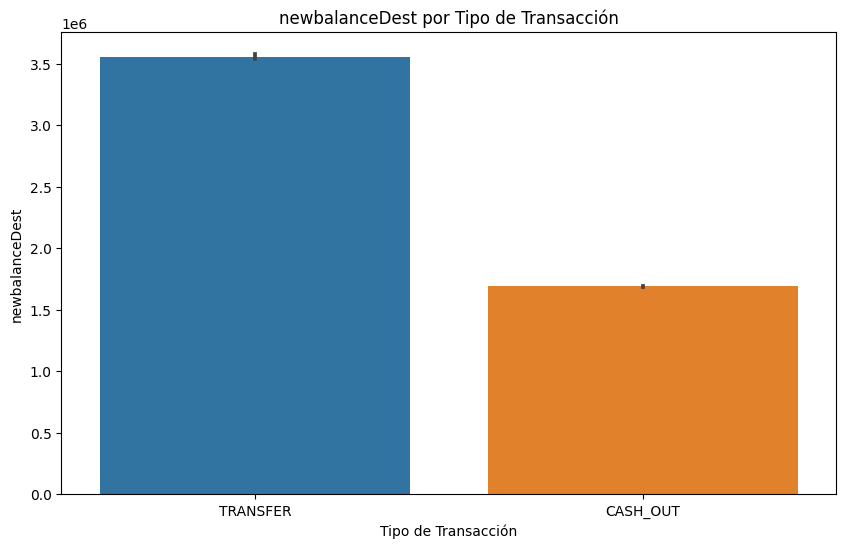

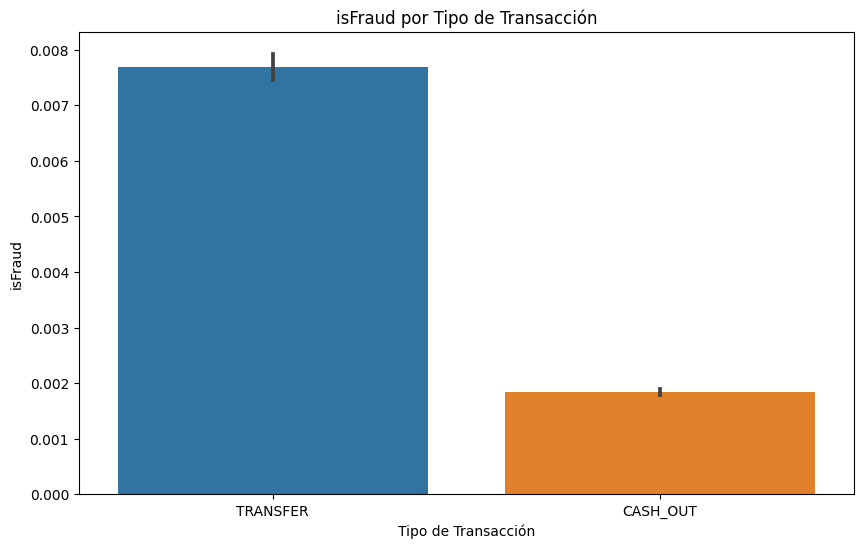

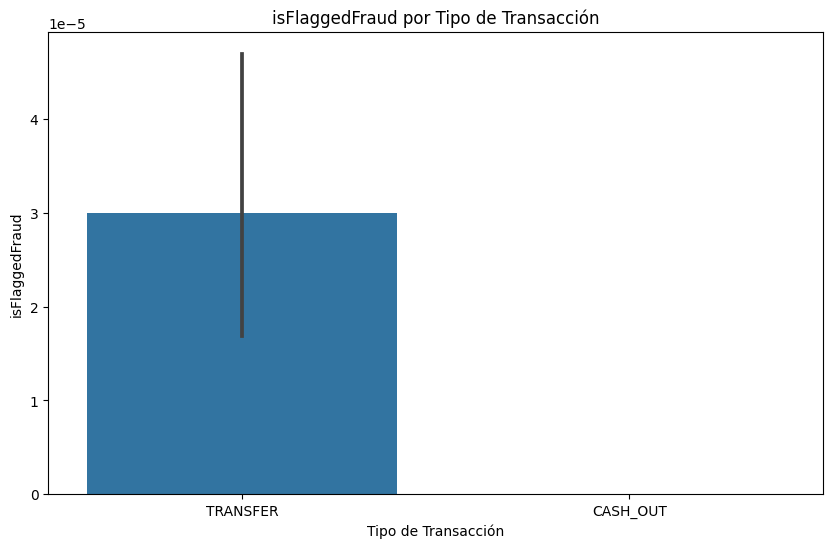

In [ ]:
#Graficos
numeric_columns1 = df_balanceado.select_dtypes(include='number').columns

# Crear gráficos para cada variable numérica
for column in numeric_columns1:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='type', y=column, data=df_balanceado)
    plt.title(f'{column} por Tipo de Transacción')
    plt.xlabel('Tipo de Transacción')
    plt.ylabel(column)
    plt.show()

## 1.7 Matriz de correlación

A continuación, se presenta el análisis de correlación con respecto al análsiis planteado anteriormente

In [ ]:
df_balanceado.corr()

<ipython-input-31-48a2708836db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_balanceado.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.037007,0.005744,-0.011280,0.037778,0.037475,0.048671,0.005015
amount,0.037007,1.000000,0.120389,0.018296,0.307133,0.497027,0.070660,0.012301
oldbalanceOrg,0.005744,0.120389,1.000000,0.778826,-0.020403,-0.010029,0.347582,0.074300
newbalanceOrig,-0.011280,0.018296,0.778826,1.000000,-0.012277,-0.015439,0.063557,0.123957
oldbalanceDest,0.037778,0.307133,-0.020403,-0.012277,1.000000,0.970060,-0.014960,-0.000969
newbalanceDest,0.037475,0.497027,-0.010029,-0.015439,0.970060,1.000000,-0.008978,-0.001053
isFraud,0.048671,0.070660,0.347582,0.063557,-0.014960,-0.008978,1.000000,0.044072
isFlaggedFraud,0.005015,0.012301,0.074300,0.123957,-0.000969,-0.001053,0.044072,1.000000


<ipython-input-32-3f2222e0a4d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_balanceado.corr()


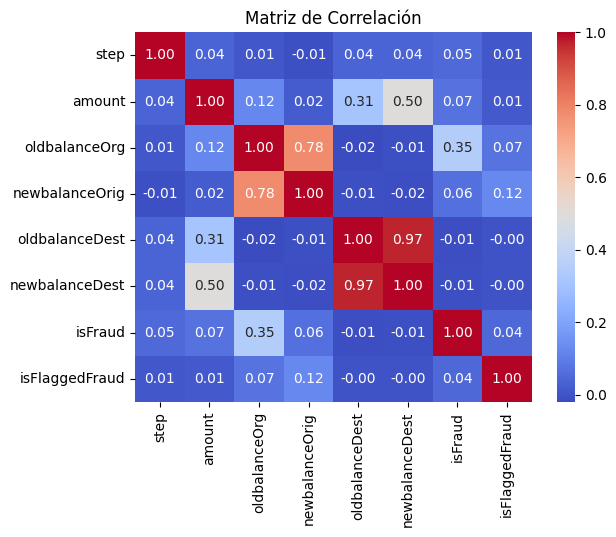

In [ ]:
# Correlación entre variables numéricas
correlation_matrix = df_balanceado.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# **2. Pre-procesamiento**

A partir del paso 1.6, se realiza un análisis de preprocesamiento centrado en la variable objetivo 'isFraud', donde 1 indica una transacción fraudulenta. Se observa que solo los registros con tipos de transacción 'CASHOUT' y 'TRANSFER' presentan valores fraudulentos. En consecuencia, se decide trabajar exclusivamente con este filtro al aplicar los modelos que se detallarán a continuación. Este enfoque de filtrar y seleccionar datos es útil para optimizar el análisis y la modelización según las características específicas de los datos y el problema.